# EDA ‚Äì Caso pr√°ctico 3
Exploraci√≥n del dataset.

In [3]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from src.trafficincidentdetection.preprocess import load_all_data, preprocess_data
from src.trafficincidentdetection.config import Settings
from collections import Counter
settings = Settings()
df = load_all_data(settings.raw_data_dir_path)
display(df)
display(df.info())
print()
print("Columnas con cantidad de valores nulos")
display(df.isnull().sum())

Cargado tweets_trafico_rd_20251029_224841.csv: 355 registros
Cargado tweets_trafico_rd_20251029_230315.csv: 5000 registros


tweet_id                                              texto  \
0     1983321358038946241  ACCIDENTE EN EL KM 154 RUTA HACIA ASUNCI√ìN MIT...   
1     1983308523284115833  Tr√°fico muy denso en la v√≠a Interamericana, po...   
2     1983305286854095304  üö® Vecinos de av. Independencia y 2 Norte alert...   
3     1983304761525846318  Se mantiene denso el tr√°fico en Avenida de Los...   
4     1983303372930445776       El tr√°fico de Santo Domingo, es desesperante   
...                   ...                                                ...   
5350  1983711555272503665  @ezegrimbe @ojosescarlatas No le pas√≥ el trapo...   
5351  1983711554144268799     @cevinacho Pas√≥ Yami Safdie y dijo que no daba   
5352  1983711546447687986  @maogyuu Y ahora que paso con el fandoom???\nP...   
5353  1983711545336156666  si yo digo q no pas√≥ nada entonces nunca pas√≥ ...   
5354  1983711544379838794  @AkimAguilar se le dice "libre tr√°fico" al reg...   

                         fecha incidente_tipo severidad  \
0    2025-10-28 23:53:54+00:00      accidente     media   
1    2025-10-28 23:02:54+00:00    desconocido      baja   
2    2025-10-28 22:50:03+00:00      accidente     media   
3    2025-10-28 22:47:57+00:00    desconocido      baja   
4    2025-10-28 22:42:26+00:00    desconocido      baja   
...                        ...            ...       ...   
5350 2025-10-30 01:44:25+00:00    desconocido      baja   
5351 2025-10-30 01:44:24+00:00    desconocido      baja   
5352 2025-10-30 01:44:22+00:00    desconocido      baja   
5353 2025-10-30 01:44:22+00:00    desconocido      baja   
5354 2025-10-30 01:44:22+00:00        bloqueo     media   

            ubicacion_texto ubicacion_geo  lat  lon  \
0     San Crist√≥bal, KM 154           NaN  NaN  NaN   
1                       NaN           NaN  NaN  NaN   
2             Independencia           NaN  NaN  NaN   
3                       NaN           NaN  NaN  NaN   
4             Santo Domingo           NaN  NaN  NaN   
...                     ...           ...  ...  ...   
5350                    NaN           NaN  NaN  NaN   
5351                    NaN           NaN  NaN  NaN   
5352                    NaN           NaN  NaN  NaN   
5353                    NaN           NaN  NaN  NaN   
5354                    NaN           NaN  NaN  NaN   

                                                    url  
0     https://twitter.com/i/web/status/1983321358038...  
1     https://twitter.com/i/web/status/1983308523284...  
2     https://twitter.com/i/web/status/1983305286854...  
3     https://twitter.com/i/web/status/1983304761525...  
4     https://twitter.com/i/web/status/1983303372930...  
...                                                 ...  
5350  https://twitter.com/i/web/status/1983711555272...  
5351  https://twitter.com/i/web/status/1983711554144...  
5352  https://twitter.com/i/web/status/1983711546447...  
5353  https://twitter.com/i/web/status/1983711545336...  
5354  https://twitter.com/i/web/status/1983711544379...  

[5355 rows x 10 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5355 entries, 0 to 5354
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   tweet_id         5355 non-null   object             
 1   texto            5355 non-null   object             
 2   fecha            5355 non-null   datetime64[ns, UTC]
 3   incidente_tipo   5355 non-null   object             
 4   severidad        5355 non-null   object             
 5   ubicacion_texto  873 non-null    object             
 6   ubicacion_geo    0 non-null      object             
 7   lat              1 non-null      float64            
 8   lon              1 non-null      float64            
 9   url              5355 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), object(7)
memory usage: 418.5+ KB


None


Columnas con cantidad de valores nulos


tweet_id              0
texto                 0
fecha                 0
incidente_tipo        0
severidad             0
ubicacion_texto    4482
ubicacion_geo      5355
lat                5354
lon                5354
url                   0
dtype: int64

## Preprocess

In [4]:
df = preprocess_data(df)
display(df)

tweet_id                                              texto  \
0     1983321358038946241  ACCIDENTE EN EL KM 154 RUTA HACIA ASUNCI√ìN MIT...   
1     1983308523284115833  Tr√°fico muy denso en la v√≠a Interamericana, po...   
2     1983305286854095304  üö® Vecinos de av. Independencia y 2 Norte alert...   
3     1983304761525846318  Se mantiene denso el tr√°fico en Avenida de Los...   
4     1983303372930445776       El tr√°fico de Santo Domingo, es desesperante   
...                   ...                                                ...   
5350  1983711555272503665  @ezegrimbe @ojosescarlatas No le pas√≥ el trapo...   
5351  1983711554144268799     @cevinacho Pas√≥ Yami Safdie y dijo que no daba   
5352  1983711546447687986  @maogyuu Y ahora que paso con el fandoom???\nP...   
5353  1983711545336156666  si yo digo q no pas√≥ nada entonces nunca pas√≥ ...   
5354  1983711544379838794  @AkimAguilar se le dice "libre tr√°fico" al reg...   

                         fecha incidente_tipo severidad  \
0    2025-10-28 23:53:54+00:00      accidente     media   
1    2025-10-28 23:02:54+00:00    desconocido      baja   
2    2025-10-28 22:50:03+00:00      accidente     media   
3    2025-10-28 22:47:57+00:00    desconocido      baja   
4    2025-10-28 22:42:26+00:00    desconocido      baja   
...                        ...            ...       ...   
5350 2025-10-30 01:44:25+00:00    desconocido      baja   
5351 2025-10-30 01:44:24+00:00    desconocido      baja   
5352 2025-10-30 01:44:22+00:00    desconocido      baja   
5353 2025-10-30 01:44:22+00:00    desconocido      baja   
5354 2025-10-30 01:44:22+00:00        bloqueo     media   

            ubicacion_texto ubicacion_geo  lat  lon  \
0     San Crist√≥bal, KM 154           nan  NaN  NaN   
1                       NaN           nan  NaN  NaN   
2             Independencia           nan  NaN  NaN   
3                       NaN           nan  NaN  NaN   
4             Santo Domingo           nan  NaN  NaN   
...                     ...           ...  ...  ...   
5350                    NaN           nan  NaN  NaN   
5351                    NaN           nan  NaN  NaN   
5352                    NaN           nan  NaN  NaN   
5353                    NaN           nan  NaN  NaN   
5354                    NaN           nan  NaN  NaN   

                                                    url  \
0     https://twitter.com/i/web/status/1983321358038...   
1     https://twitter.com/i/web/status/1983308523284...   
2     https://twitter.com/i/web/status/1983305286854...   
3     https://twitter.com/i/web/status/1983304761525...   
4     https://twitter.com/i/web/status/1983303372930...   
...                                                 ...   
5350  https://twitter.com/i/web/status/1983711555272...   
5351  https://twitter.com/i/web/status/1983711554144...   
5352  https://twitter.com/i/web/status/1983711546447...   
5353  https://twitter.com/i/web/status/1983711545336...   
5354  https://twitter.com/i/web/status/1983711544379...   

                                            texto_clean  texto_len  hora  \
0     accidente en el km     ruta hacia asunci√≥n mit...        222    23   
1     tr√°fico muy denso en la v√≠a interamericana  po...        104    23   
2     vecinos de av  independencia y   norte alertan...        241    22   
3     se mantiene denso el tr√°fico en avenida de los...        117    22   
4          el tr√°fico de santo domingo  es desesperante         44    22   
...                                                 ...        ...   ...   
5350  ezegrimbe  ojosescarlatas no le pas√≥ el trapo ...        151     1   
5351      cevinacho pas√≥ yami safdie y dijo que no daba         45     1   
5352  maogyuu y ahora que paso con el fandoom    por...         97     1   
5353  si yo digo q no pas√≥ nada entonces nunca pas√≥ ...         50     1   
5354  akimaguilar se le dice  libre tr√°fico  al regl...        292     1   

      dia_semana  en_sd  en_santiago  pa

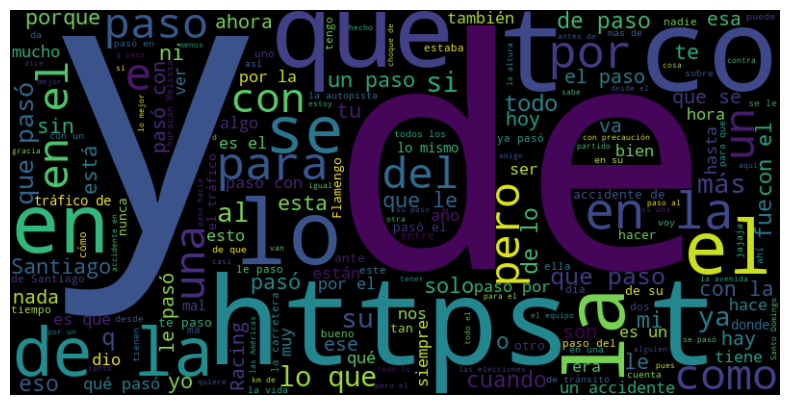

Most common words: [(' ', 132048), ('a', 72550), ('e', 69774), ('o', 53800), ('s', 40930), ('n', 38761), ('r', 36011), ('i', 34850), ('t', 31121), ('l', 29831), ('c', 24732), ('d', 24706), ('u', 23261), ('p', 18471), ('m', 15324), ('.', 7984), ('h', 7978), ('g', 7438), ('b', 6828), ('q', 6606)]


In [8]:
df['texto'] = df['texto'].astype(str)
df.dropna(subset=['texto'], inplace=True)
df.describe(include='all')
if 'sentimiento' in df.columns:
    df['sentimiento'].value_counts().plot(kind='bar')
    plt.title('Distribuci√≥n de sentimiento')
    plt.show()

text = ' '.join(df['texto'].tolist())
wordcloud = WordCloud(width=800, height=400).generate(text)
#wordcloud.to_image()
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
# Top N frequent words
words = text.split()
word_freq = Counter(text)
most_common_words = word_freq.most_common(20)
print("Most common words:", most_common_words)